In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import Interpolazione, final_val

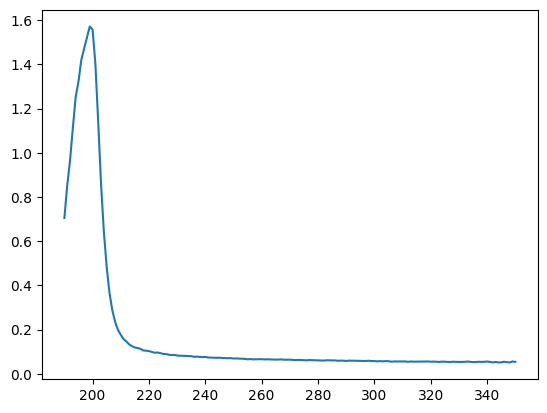

In [13]:
filename = './data/fondoPBS.TXT'

fondo = pd.read_csv(filename, sep='\t', header=None, skiprows=19)  # Adjust the delimiter if necessary
fondo.columns = ['Wavelength', 'Intensity']
fondo.tail()
plt.plot(fondo['Wavelength'], fondo['Intensity'])
plt.show()

In [40]:
fig = go.Figure()

colors = px.colors.sequential.Turbo

for i in range(6):
    spectrum = pd.read_csv(f'./data/C{i}.TXT', sep='\t', header=None, skiprows=19)  # Adjust the delimiter if necessary
    spectrumt2 = pd.read_csv(f'./data/C{i}2.TXT', sep='\t', header=None, skiprows=19)  # Adjust the delimiter if necessary
    spectrum.columns = ['Wavelength', 'Intensity']
    spectrumt2.columns = ['Wavelength', 'Intensity']
    spectrum = spectrum.dropna()
    spectrumt2 = spectrumt2.dropna()

    spectrum['Intensity'] = spectrum['Intensity'] - fondo['Intensity']
    spectrumt2['Intensity'] = spectrumt2['Intensity'] - fondo['Intensity']

    # appaio code:
    coda = spectrum['Intensity'][spectrum['Wavelength'] == 340].values[0]
    coda2 = spectrumt2['Intensity'][spectrumt2['Wavelength'] == 340].values[0]
    spectrum['Intensity'] = spectrum['Intensity'] - coda
    spectrumt2['Intensity'] = spectrumt2['Intensity'] - coda2

    fig.add_trace(go.Scatter(x=spectrum['Wavelength'], y=spectrum['Intensity'], mode='lines', name=f'C{i}', line_color=colors[i]))
    fig.add_trace(go.Scatter(x=spectrumt2['Wavelength'], y=spectrumt2['Intensity'], mode='lines', name=f'C{i}2', line_color=colors[i], line=dict(dash='dash')))

fig.update_layout(
    title='Spectrum and Spectrum T2',
    xaxis_title='Wavelength',
    yaxis_title='Intensity',
    legend_title='Legend'
)

fig.show()
